In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("C:\\Users\\Rizwan\\Desktop\\datasets\\movies.csv")

In [3]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
69,Hero at Large,PG,Comedy,1980,"February 8, 1980 (United States)",6.0,1500,Martin Davidson,AJ Carothers,John Ritter,United States,0,15934737.0,Kings Road Entertainment,98
193,Rollover,R,Drama,1981,"December 11, 1981 (United States)",5.4,1100,Alan J. Pakula,Howard Kohn,Jane Fonda,United States,16000000,10851261.0,IPC Films,116
3463,Stuart Little,PG,Adventure,1999,"December 17, 1999 (United States)",5.9,128000,Rob Minkoff,E.B. White,Michael J. Fox,Germany,133000000,300135367.0,Columbia Pictures,84
1578,The Unbelievable Truth,R,Comedy,1989,"November 8, 1990 (Australia)",7.3,5000,Hal Hartley,Hal Hartley,Adrienne Shelly,United States,75000,NaN,Action Features,90
1312,Stand and Deliver,PG,Biography,1988,"March 11, 1988 (United States)",7.3,17000,Ramón Menéndez,Ramón Menéndez,Edward James Olmos,United States,0,13994920.0,American Playhouse,103


In [4]:
# Clean and convert the "released" column
df['released'] = df['released'].str.extract(r'([A-Za-z]+ \d{1,2}, \d{4})')[0]
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y')
df.sample(6)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3176,One Eight Seven,R,Drama,1997,1997-07-30,6.7,23000,Kevin Reynolds,Scott Yagemann,Samuel L. Jackson,United States,20000000,5727130.0,Icon Entertainment International,119
703,Once Bitten,PG-13,Comedy,1985,1985-11-15,5.5,14000,Howard Storm,Dimitri Villard,Lauren Hutton,United States,3200000,10000000.0,Night Life Inc.,94
3165,Love Jones,R,Drama,1997,1997-03-14,7.4,4300,Theodore Witcher,Theodore Witcher,Larenz Tate,United States,10000000,12782749.0,Addis Wechsler Pictures,104
462,Hanna K.,R,Drama,1983,1983-09-07,6.3,661,Costa-Gavras,Franco Solinas,Jill Clayburgh,Israel,0,NaN,K.G. Productions,111
3658,Unbreakable,PG-13,Drama,2000,2000-11-22,7.3,396000,M. Night Shyamalan,M. Night Shyamalan,Bruce Willis,United States,75000000,248118121.0,Touchstone Pictures,106
2941,Evita,PG,Biography,1996,1997-01-10,6.3,34000,Alan Parker,Tim Rice,Madonna,United States,55000000,141047179.0,Hollywood Pictures,135


In [5]:
df.drop("rating",axis=1,inplace=True) #   remove irrelevant clumn

In [6]:
df.keys()

Index(['name', 'genre', 'year', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [7]:
df.shape

(4000, 14)

In [8]:
# Iterate through columns and print unique values and their counts
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for '{column}':\n{value_counts}\n")

Value counts for 'name':
Hamlet                           3
The Adventures of Pinocchio      2
Independence Day                 2
No Man's Land                    2
Chocolat                         2
                                ..
Time of the Gypsies              1
Masquerade                       1
Phantasm II                      1
Tucker: The Man and His Dream    1
Dr. Dolittle 2                   1
Name: name, Length: 3971, dtype: int64

Value counts for 'genre':
Comedy       1355
Drama         807
Action        775
Crime         302
Adventure     231
Biography     175
Horror        158
Animation     113
Fantasy        33
Mystery        13
Thriller       11
Romance         8
Family          8
Sci-Fi          6
Western         3
Music           1
History         1
Name: genre, dtype: int64

Value counts for 'year':
1991    200
1989    200
1995    200
1994    200
1993    200
1992    200
1998    200
1990    200
1988    200
1997    200
1987    200
1986    200
1985    200
1999    20

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      4000 non-null   object        
 1   genre     4000 non-null   object        
 2   year      4000 non-null   int64         
 3   released  3947 non-null   datetime64[ns]
 4   score     4000 non-null   float64       
 5   votes     4000 non-null   int64         
 6   director  4000 non-null   object        
 7   writer    3999 non-null   object        
 8   star      3999 non-null   object        
 9   country   4000 non-null   object        
 10  budget    4000 non-null   int64         
 11  gross     3831 non-null   float64       
 12  company   3990 non-null   object        
 13  runtime   4000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 437.6+ KB


In [10]:
df.isna().sum()

name          0
genre         0
year          0
released     53
score         0
votes         0
director      0
writer        1
star          1
country       0
budget        0
gross       169
company      10
runtime       0
dtype: int64

In [11]:
# Find the indices of missing values
missing_indices = np.argwhere(np.vectorize(lambda x: x is np.nan or x == 'missing')(df))

# Get the corresponding column names
missing_columns = [df.columns[idx[1]] for idx in missing_indices]

# Combine indices and column names
missing_info = list(zip(missing_indices, missing_columns))

print("Indices and Column Names of Missing Values:")
for info in missing_info:
    print(f"Row: {info[0][0]}, Column: {info[0][1]}, Column Name: {info[1]}")




Indices and Column Names of Missing Values:
Row: 408, Column: 12, Column Name: company
Row: 464, Column: 12, Column Name: company
Row: 469, Column: 12, Column Name: company
Row: 474, Column: 8, Column Name: star
Row: 633, Column: 12, Column Name: company
Row: 969, Column: 12, Column Name: company
Row: 1033, Column: 12, Column Name: company
Row: 1572, Column: 12, Column Name: company
Row: 1594, Column: 12, Column Name: company
Row: 1630, Column: 12, Column Name: company
Row: 1806, Column: 12, Column Name: company
Row: 1820, Column: 7, Column Name: writer


In [12]:
# Calculate the percentage of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Display the results
print("Percentage of missing values in each column:")
print(missing_percentages)


Percentage of missing values in each column:
name        0.000
genre       0.000
year        0.000
released    1.325
score       0.000
votes       0.000
director    0.000
writer      0.025
star        0.025
country     0.000
budget      0.000
gross       4.225
company     0.250
runtime     0.000
dtype: float64


In [13]:
df.dropna(inplace=True
         )

In [14]:
df.isnull().sum()

name        0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [15]:
df.duplicated().sum()

0

# EDA

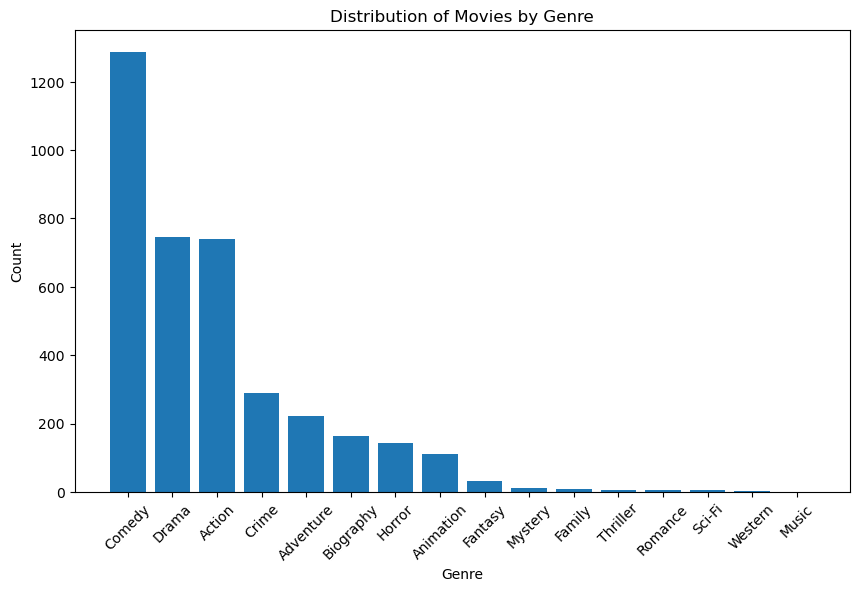

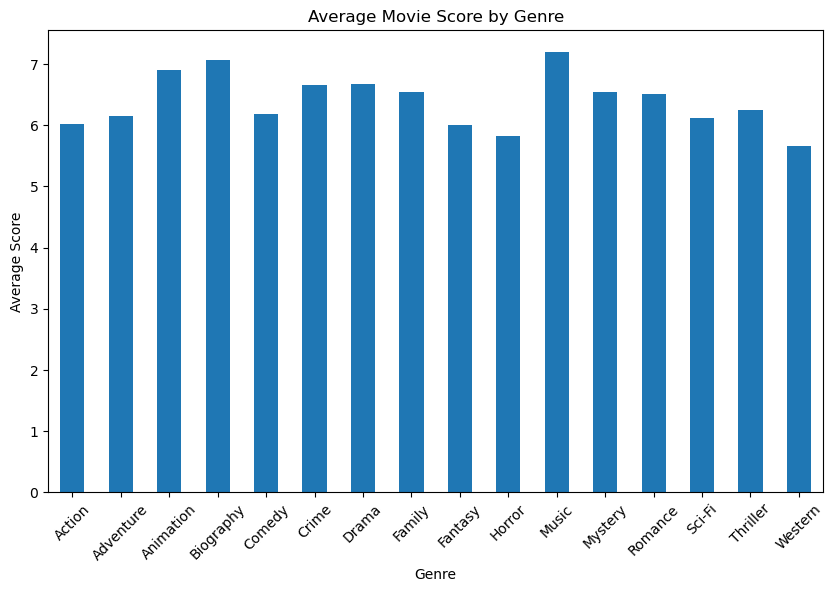

In [16]:
# Genre distribution
plt.figure(figsize=(10,6))
genre_counts = df['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movies by Genre')
plt.show()

# Average score by genre
plt.figure(figsize=(10,6))
genre_avg_score = df.groupby('genre')['score'].mean()
genre_avg_score.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.title('Average Movie Score by Genre')
plt.show()

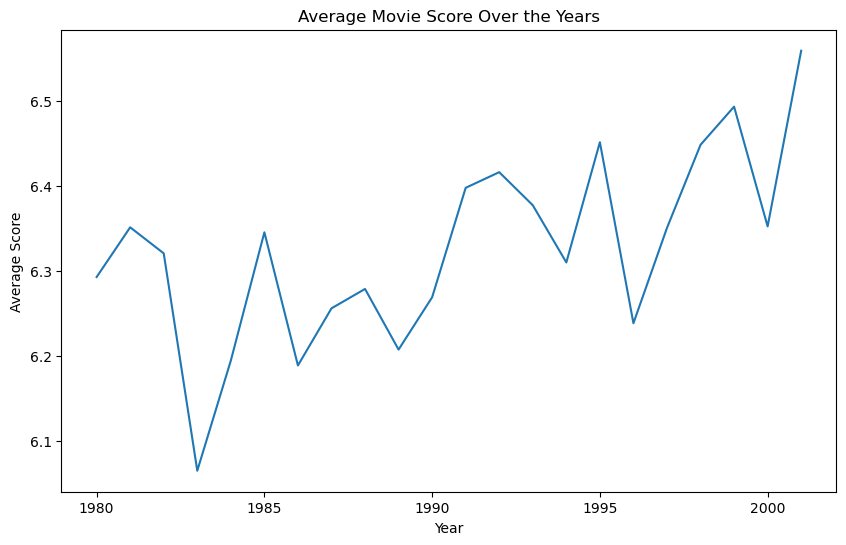

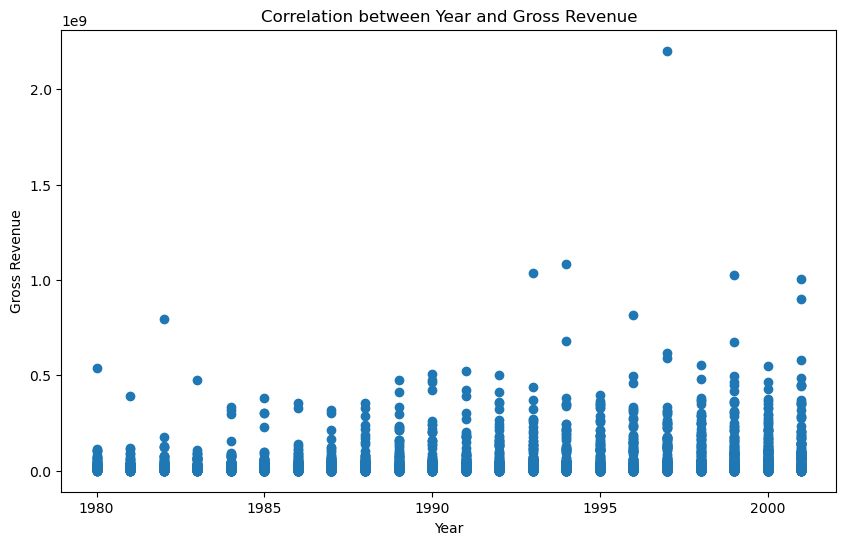

In [17]:
# Average score over the years
plt.figure(figsize=(10,6))

yearly_avg_score = df.groupby('year')['score'].mean()
yearly_avg_score.plot()
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Movie Score Over the Years')
plt.show()

# Correlation between year and gross revenue
plt.figure(figsize=(10,6))

plt.scatter(df['year'], df['gross'])
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.title('Correlation between Year and Gross Revenue')
plt.show()

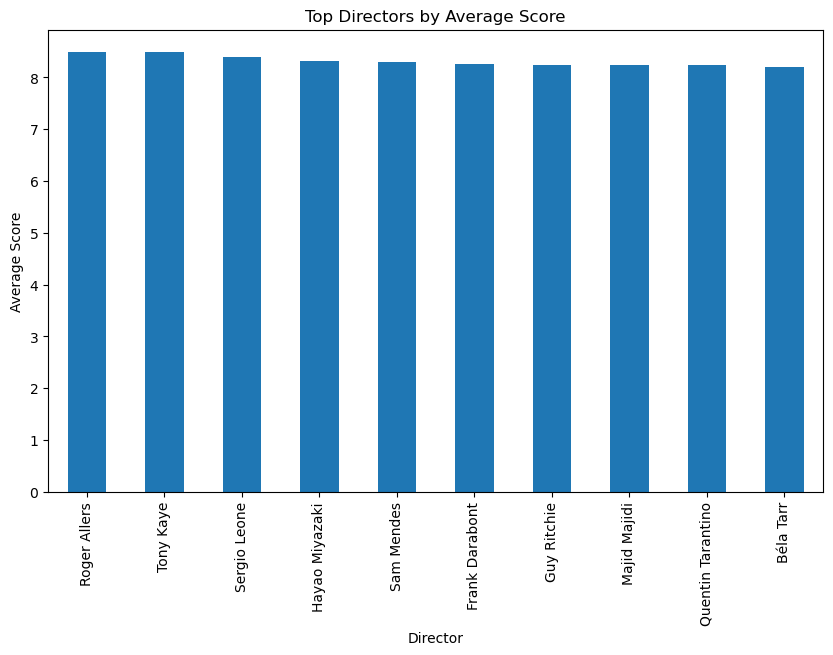

director         writer               star           
Woody Allen      Woody Allen          Woody Allen        11
Alan Alda        Alan Alda            Alan Alda           4
Tommy Chong      Tommy Chong          Cheech Marin        4
Woody Allen      Woody Allen          Mia Farrow          4
Albert Brooks    Albert Brooks        Albert Brooks       3
Gregg Araki      Gregg Araki          James Duval         3
Kenneth Branagh  William Shakespeare  Kenneth Branagh     3
Mel Brooks       Mel Brooks           Mel Brooks          3
Robert Zemeckis  Robert Zemeckis      Michael J. Fox      3
Sam Raimi        Sam Raimi            Bruce Campbell      3
dtype: int64

In [18]:
# Top directors by average score
plt.figure(figsize=(10,6))

top_directors_avg_score = df.groupby('director')['score'].mean().nlargest(10)
top_directors_avg_score.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Average Score')
plt.title('Top Directors by Average Score')
plt.show()

# Directors' collaboration with writers and stars
director_collaborations = df.groupby(['director', 'writer', 'star']).size().nlargest(10)
director_collaborations

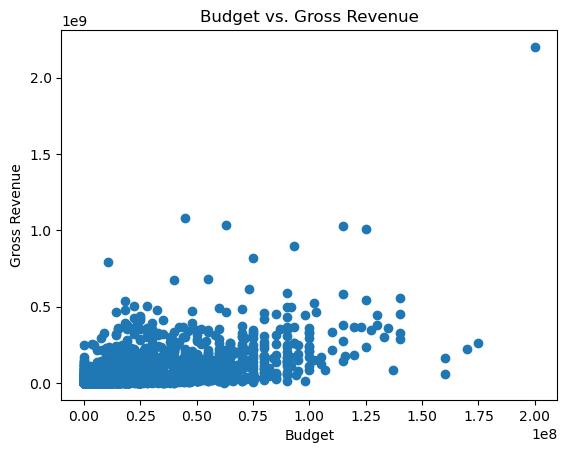

Empty DataFrame
Columns: [name, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [19]:
# Budget vs. Gross Revenue
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Budget vs. Gross Revenue')
plt.show()

# Outliers with high budget and low gross
outliers = df[(df['budget'] > 100000000) & (df['gross'] < 50000000)]
print(outliers)


In [21]:
# Top writers and stars by average score
top_writers_avg_score = df.groupby('writer')['score'].mean().nlargest(10)
top_stars_avg_score = df.groupby('star')['score'].mean().nlargest(10)
top_writers_avg_score
top_stars_avg_score


star
Daveigh Chase         8.6
Edward Norton         8.5
Mark Hamill           8.5
Philippe Noiret       8.5
Yôji Matsuda          8.4
Audrey Tautou         8.3
F. Murray Abraham     8.3
Jason Statham         8.3
Jürgen Prochnow       8.3
Mohammad Amir Naji    8.3
Name: score, dtype: float64

In [22]:
top_writers_avg_score

writer
Thomas Keneally     8.900
Chuck Palahniuk     8.800
J.R.R. Tolkien      8.800
Winston Groom       8.800
Leigh Brackett      8.700
Vincenzo Cerami     8.600
Irene Mecchi        8.500
Nicholas Pileggi    8.450
Harry Grey          8.400
Hayao Miyazaki      8.325
Name: score, dtype: float64

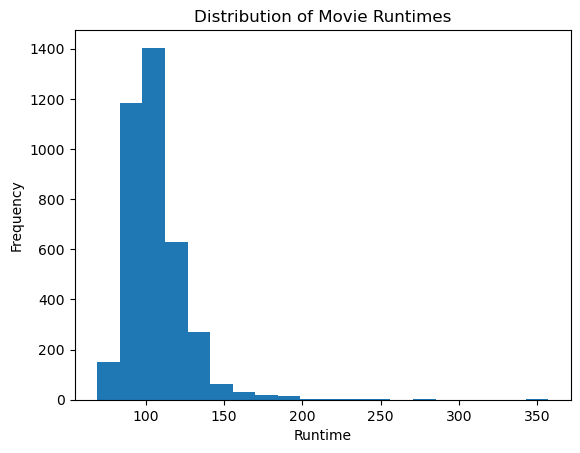

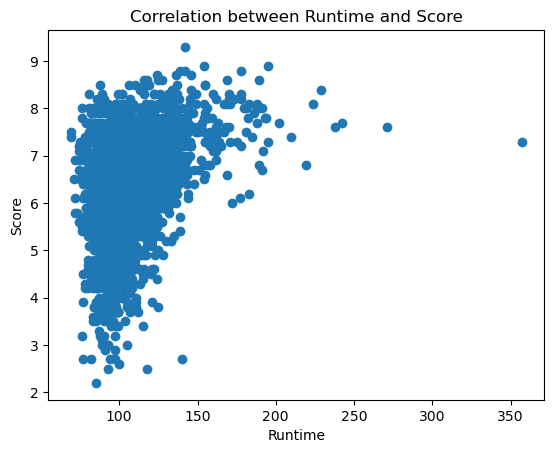

In [23]:
# Distribution of movie runtimes
plt.hist(df['runtime'], bins=20)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

# Correlation between runtime and score
plt.scatter(df['runtime'], df['score'])
plt.xlabel('Runtime')
plt.ylabel('Score')
plt.title('Correlation between Runtime and Score')
plt.show()


In [24]:
# Top production companies by average score and gross revenue
top_companies_avg_score = df.groupby('company')['score'].mean().nlargest(10)
top_companies_gross = df.groupby('company')['gross'].sum().nlargest(10)
print(top_companies_avg_score)
print(top_companies_gross)


company
Cecchi Gori Pictures             8.6
Melampo Cinematografica          8.6
Strong Heart/Demme Production    8.6
Tokuma Shoten                    8.6
Cristaldifilm                    8.5
Claudie Ossard Productions       8.3
Kanun parvaresh fekri            8.3
Natant                           8.3
1+2 Seisaku Iinkai               8.2
13 Productions                   8.2
Name: score, dtype: float64
company
Universal Pictures       1.643803e+10
Paramount Pictures       1.480054e+10
Warner Bros.             1.389824e+10
Twentieth Century Fox    1.233192e+10
Columbia Pictures        9.153184e+09
Touchstone Pictures      7.059807e+09
Walt Disney Pictures     6.441498e+09
New Line Cinema          4.558325e+09
TriStar Pictures         3.955744e+09
Dreamworks Pictures      2.767440e+09
Name: gross, dtype: float64


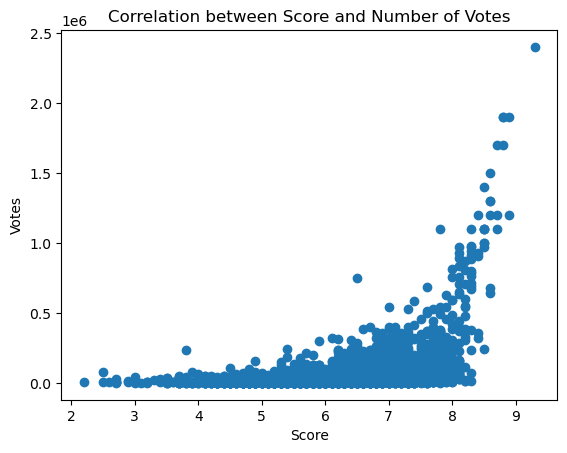

In [25]:
# Correlation between score and number of votes
plt.scatter(df['score'], df['votes'])
plt.xlabel('Score')
plt.ylabel('Votes')
plt.title('Correlation between Score and Number of Votes')
plt.show()


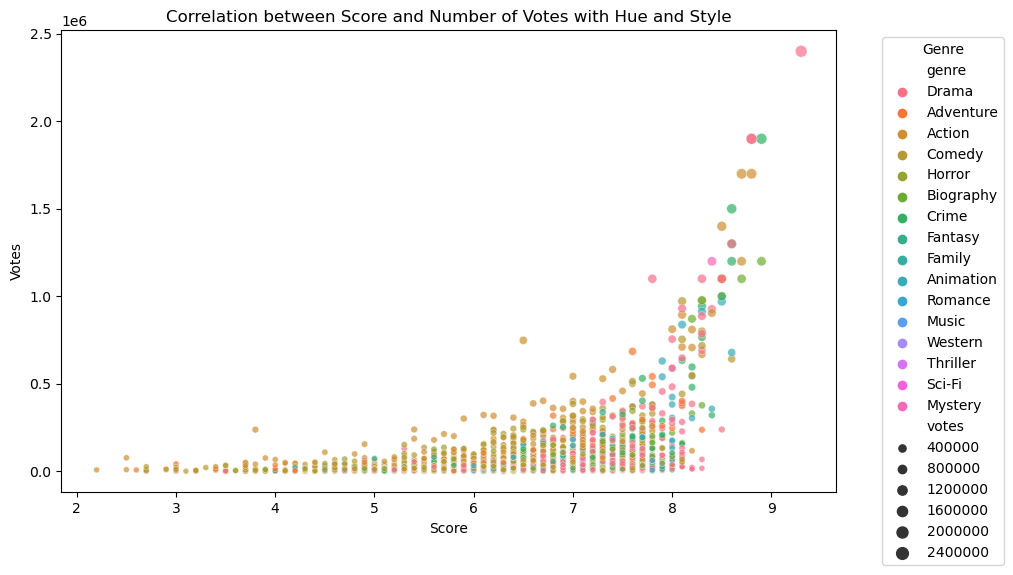

In [26]:

# Create a scatter plot with hue and style
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score', y='votes', hue='genre', size='votes', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Votes')
plt.title('Correlation between Score and Number of Votes with Hue and Style')
plt.legend(title='Genre')
# Move the legend outside the chart
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


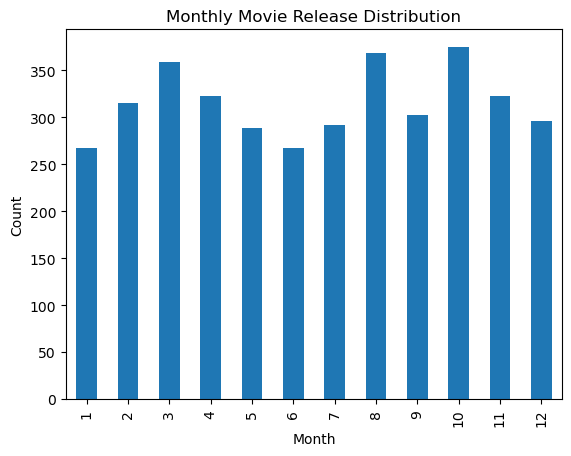

In [27]:
# Monthly movie release distribution
df['released'] = pd.to_datetime(df['released'])
df['release_month'] = df['released'].dt.month
release_month_counts = df['release_month'].value_counts().sort_index()
release_month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Movie Release Distribution')
plt.show()


# Using seaborn

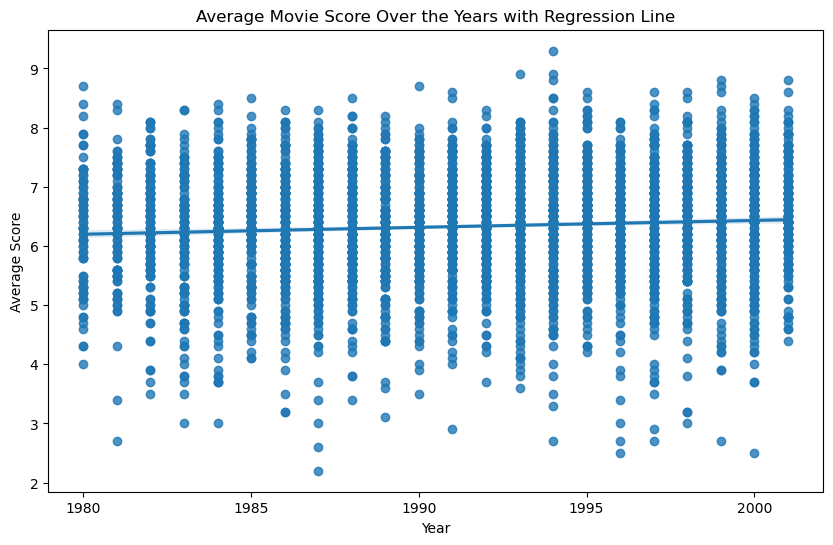

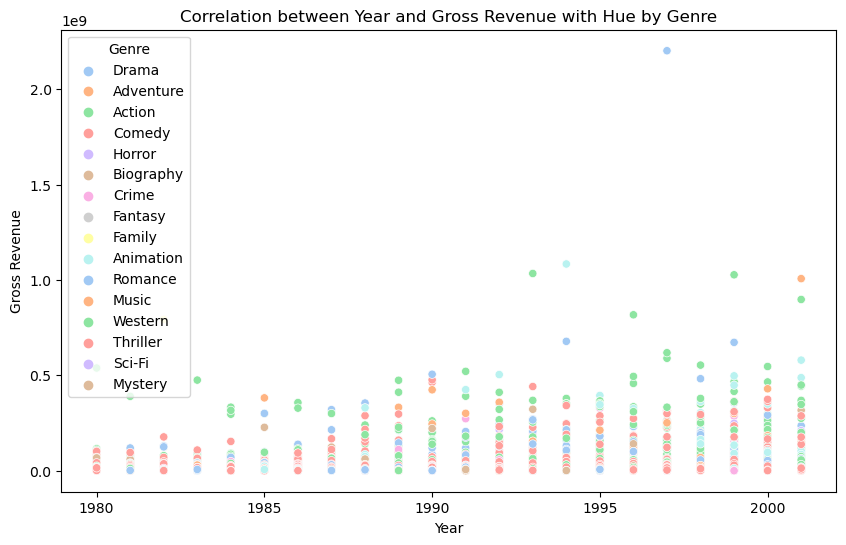

In [30]:
# Average score over the years with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='year', y='score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Movie Score Over the Years with Regression Line')
plt.show()

# Correlation between year and gross revenue with hue by genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='gross', hue='genre',palette="pastel")
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.title('Correlation between Year and Gross Revenue with Hue by Genre')
plt.legend(title='Genre')
plt.show()


In [ ]:
# Top directors by average score with hue by writer
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='director', y='score',hue='writer')
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Average Score')
plt.title('Top Directors by Average Score with Hue by Writer')
plt.legend(title='Writer')
plt.show()

# Directors' collaboration with writers and stars
director_collaborations = df.groupby(['director', 'writer', 'star']).size().reset_index(name='collaborations')
top_collaborations = director_collaborations.nlargest(10, 'collaborations')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_collaborations, x='director', y='collaborations', hue='star')
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Number of Collaborations')
plt.title('Top Directors by Number of Collaborations with Hue by Star')
plt.legend(title='Star')
plt.show()


In [ ]:
# Budget vs. Gross Revenue with regression line and hue by genre
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Budget vs. Gross Revenue with Regression Line and Hue by Genre')
plt.show()

# Outliers with high budget and low gross with hue by year
outliers = df[(df['budget'] > 100000000) & df['gross'] < 50000000)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers, x='budget', y='gross', hue='year', palette='tab10')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Outliers: High Budget, Low Gross with Hue by Year')
plt.legend(title='Year')
plt.show()


In [ ]:
# Distribution of movies by country with hue by genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', hue='genre', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Movies by Country with Hue by Genre')
plt.legend(title='Genre')
plt.show()

# Correlation between country and average score with hue by year
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='score', hue='year', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.title('Average Movie Score by Country with Hue by Year')
plt.legend(title='Year')
plt.show()
